In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cancer_race = "/Users/raulfnf/Desktop/project-1/Resources/Underlying cause of Death 2019 to 2020 by Race.csv"

cancer_race_df = pd.read_csv(cancer_race)
cancer_race_df.head()

,Notes,State,State Code,Year,Year Code,Cause of death,Cause of death Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,2019.0,2019.0,"Tongue, unspecified - Malignant neoplasms",C02.9,White,2106-3,34.0,3437480.0,1
1,NaN,Alabama,1.0,2019.0,2019.0,"Mouth, unspecified - Malignant neoplasms",C06.9,White,2106-3,26.0,3437480.0,0.8
2,NaN,Alabama,1.0,2019.0,2019.0,"Tonsil, unspecified - Malignant neoplasms",C09.9,White,2106-3,12.0,3437480.0,Unreliable
3,NaN,Alabama,1.0,2019.0,2019.0,"Oropharynx, unspecified - Malignant neoplasms",C10.9,White,2106-3,14.0,3437480.0,Unreliable
4,NaN,Alabama,1.0,2019.0,2019.0,"Pharynx, unspecified - Malignant neoplasms",C14.0,Black or African American,2054-5,18.0,1342306.0,Unreliable


In [3]:
cancer_race_df.columns

Index(['Notes', 'State', 'State Code', 'Year', 'Year Code', 'Cause of death',
       'Cause of death Code', 'Race', 'Race Code', 'Deaths', 'Population',
       'Crude Rate'],
      dtype='object')

In [4]:
clean_cancer_race = cancer_race_df.drop(['Notes', 'State', 'State Code', 'Year Code',
       'Cause of death Code','Race Code', 'Population','Crude Rate'], axis = 1)
for x in clean_cancer_race.index:
  if clean_cancer_race.loc[x, "Year"] < 2020.0:
    clean_cancer_race.drop(x, inplace = True)
clean_cancer_race.head()

,Year,Cause of death,Race,Deaths
101,2020.0,"Tongue, unspecified - Malignant neoplasms",White,25.0
102,2020.0,"Mouth, unspecified - Malignant neoplasms",White,31.0
103,2020.0,Malignant neoplasm of parotid gland,White,10.0
104,2020.0,"Oropharynx, unspecified - Malignant neoplasms",White,16.0
105,2020.0,"Pharynx, unspecified - Malignant neoplasms",Black or African American,15.0


In [5]:
clean_cancer_race.to_csv("/Users/raulfnf/Desktop/project-1/Resources/Complete cancer race data.csv")
clean_cancer_race.head()

,Year,Cause of death,Race,Deaths
101,2020.0,"Tongue, unspecified - Malignant neoplasms",White,25.0
102,2020.0,"Mouth, unspecified - Malignant neoplasms",White,31.0
103,2020.0,Malignant neoplasm of parotid gland,White,10.0
104,2020.0,"Oropharynx, unspecified - Malignant neoplasms",White,16.0
105,2020.0,"Pharynx, unspecified - Malignant neoplasms",Black or African American,15.0


In [6]:
cancer_race_uniques = clean_cancer_race.Race.value_counts() 
cancer_race_uniques


White                               3458
Black or African American            907
Asian or Pacific Islander            336
American Indian or Alaska Native      78
Name: Race, dtype: int64

In [7]:
cancer_death_byrace = clean_cancer_race.groupby(["Race"]).sum()["Deaths"]
cancer_death_byrace

Race
American Indian or Alaska Native      1706.0
Asian or Pacific Islander            16122.0
Black or African American            64391.0
White                               498931.0
Name: Deaths, dtype: float64

In [8]:
#race bins
race_counts = pd.DataFrame(cancer_death_byrace)
race_counts

,Deaths
Race,
American Indian or Alaska Native,1706.0
Asian or Pacific Islander,16122.0
Black or African American,64391.0
White,498931.0


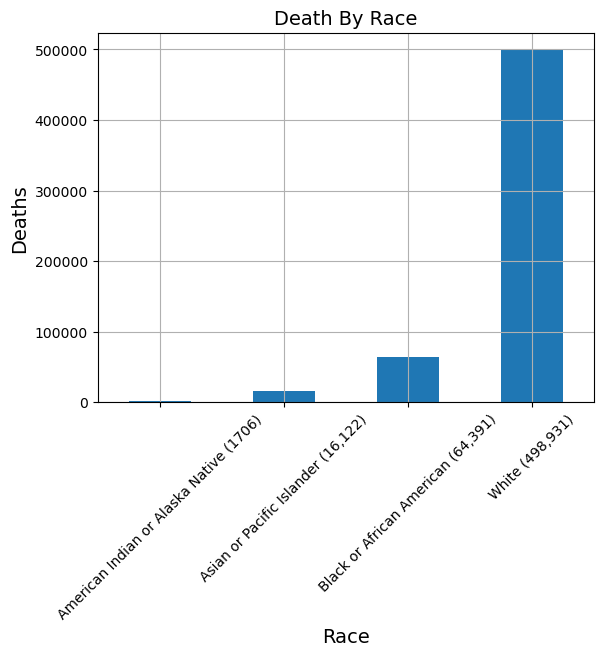

In [12]:
data = {"Race" : [f"American Indian or Alaska Native (1706)",
"Asian or Pacific Islander (16,122)",
"Black or African American (64,391)", "White (498,931)"], "Deaths" : [1706.0, 16122.0, 64391.0, 498931.0]}
df = pd.DataFrame(data)
df.plot(x='Race', y="Deaths", kind="bar", rot=45, legend=False)
colors = ['green','blue','purple','brown']
plt.title('Death By Race', fontsize=14)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.grid(True)
plt.show()